# Karina Schmidt - 2023314

CA2 - Machine Learning and Data Preparation 

In [87]:
# import libraries

import pandas as pd
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt


In [88]:
# import the file for heart failure
df = pd.read_csv('NHANES_age_prediction.csv')

# DATA UNDERSTANDING

In [89]:
# Display first 5 row and head
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [91]:
# Check missing value


missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv("NHANES_age_prediction.csv", na_values = missing_value_formats)

def make_int(i):
    try:
        return int(i)
    except:
        return pd.np.nan 

So, after applying the code, it is now possible to see the missing values change to NaN.


In [92]:
df.head(30)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
5,73581.0,Adult,50.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08
6,73587.0,Adult,14.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11
7,73596.0,Adult,57.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93
8,73607.0,Senior,75.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47
9,73610.0,Adult,43.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24


In [93]:
# Rename the columns in the Dataframe

df.rename(columns = ({'RIDAGEYR': 'age', 'RIAGENDR': 'gender', 'PAQ605': 'sport','BMXBMI': 'body_max', 'LBXGLU': 'blood_glu', 'DIQ010': 'diabetic', 'LBXGLT': 'resp_oral', 'LBXIN': 'blood_insulin'}), 
                inplace=True)

In [94]:
df.head()

,SEQN,age_group,age,gender,sport,body_max,blood_glu,diabetic,resp_oral,blood_insulin
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [95]:
df.shape

(2278, 10)

# EDA

In [96]:
df.describe()

,SEQN,age,gender,sport,body_max,blood_glu,diabetic,resp_oral,blood_insulin
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [97]:
df.isnull().sum()

SEQN             0
age_group        0
age              0
gender           0
sport            0
body_max         0
blood_glu        0
diabetic         0
resp_oral        0
blood_insulin    0
dtype: int64

In [98]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
import missingno as msno

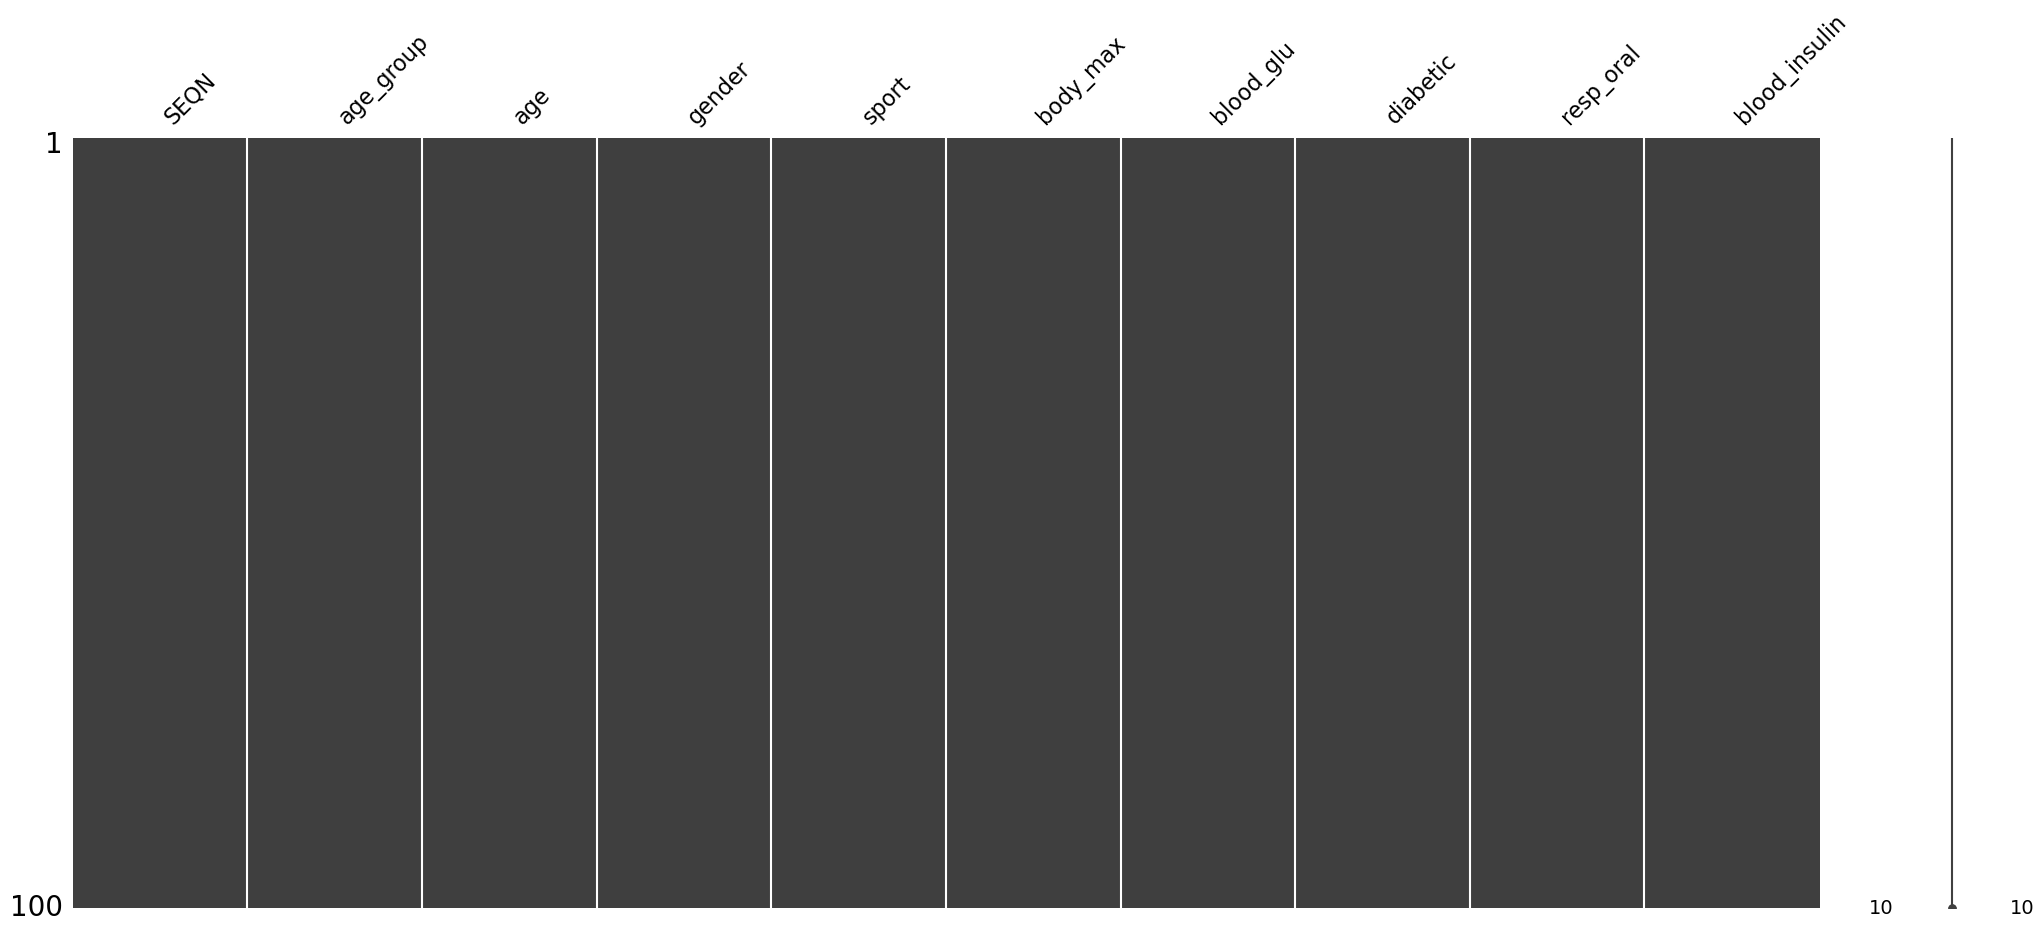

In [100]:
ax = msno.matrix(df.sample(100))

[CODIGO ACIMA] Este código ajuda a identificar padrões de valores ausentes no conjunto de dados, destacando áreas onde há ausência de dados. O eixo x representa as colunas do DataFrame, o eixo y representa as linhas e as células brancas indicam valores ausentes. Isso pode ser útil para avaliar a integridade dos dados e decidir como lidar com valores ausentes, se necessário.

In [101]:
df.drop('SEQN', axis = 1, inplace=True)

In [102]:
df.head()

,age_group,age,gender,sport,body_max,blood_glu,diabetic,resp_oral,blood_insulin
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
le = LabelEncoder()
df.age_group = le.fit_transform(df.age_group)

In [105]:
df.head()

,age_group,age,gender,sport,body_max,blood_glu,diabetic,resp_oral,blood_insulin
0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [106]:
from scipy import stats

<Figure size 1200x800 with 0 Axes>

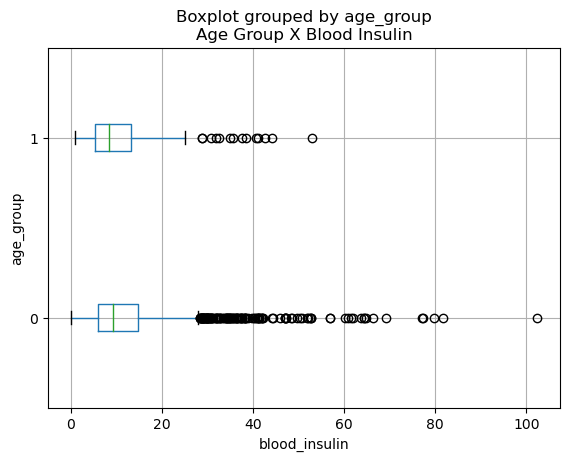

In [107]:

# Selecionando as colunas desejadas para o boxplot
columns_to_plot = ['age_group', 'blood_insulin']

# Criando um boxplot
plt.figure(figsize=(12, 8))
df.boxplot(column='blood_insulin', by='age_group', vert=False)
plt.title('Age Group X Blood Insulin')
plt.xlabel('blood_insulin')
plt.ylabel('age_group')
plt.show()

<Figure size 1200x800 with 0 Axes>

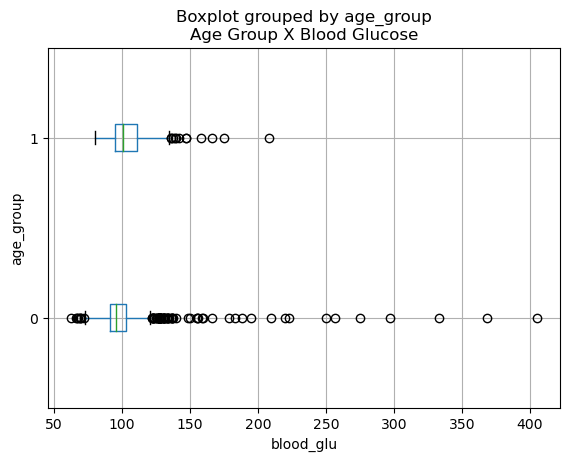

In [108]:
# Selecionando as colunas desejadas para o boxplot
columns_to_plot = ['age_group', 'blood_glu']

# Criando um boxplot
plt.figure(figsize=(12, 8))
df.boxplot(column='blood_glu', by='age_group', vert=False)
plt.title('Age Group X Blood Glucose')
plt.xlabel('blood_glu')
plt.ylabel('age_group')
plt.show()

# PCA

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [155]:
# Assuming "failure_no_label" is a subset of your dataframe without the label column
failure_no_label = df.drop('age_group', axis=1)

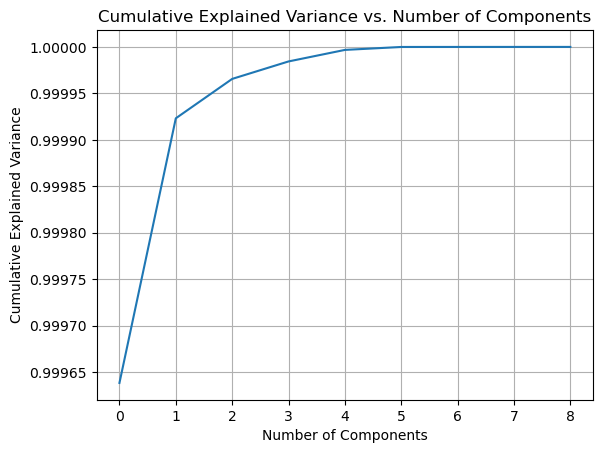

In [156]:
# Perform PCA
pca = PCA().fit(failure_no_label)

# Plot the cumulative explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

This code uses the PCA class from scikit-learn to fit the PCA model on your data and then plots the cumulative explained variance. The x-axis represents the number of components, and the y-axis represents the cumulative explained variance. This plot can help you decide how many components to retain for your desired level of explained variance.

In [157]:
pca = PCA(3)
projected = pca.fit_transform(failure_no_label)

In [158]:
projected.shape

(2278, 3)

In [159]:
newfailure_df = pd.DataFrame(projected, columns =['F1', 'F2', 'F3'])

In [160]:
newfailure_df.head()

,F1,F2,F3
0,5127.853295,39.702814,-12.950023
1,5123.853626,-38.711049,9.603183
2,5115.854930,-51.444231,17.989504
3,5114.856928,-29.183024,6.387583
4,5111.857927,-31.396033,-0.734321


In [161]:
newfailure_df["age_group"] = df["age_group"]

In [162]:
newfailure_df.head()

,F1,F2,F3,age_group
0,5127.853295,39.702814,-12.950023,Adult
1,5123.853626,-38.711049,9.603183,Adult
2,5115.854930,-51.444231,17.989504,Adult
3,5114.856928,-29.183024,6.387583,Adult
4,5111.857927,-31.396033,-0.734321,Adult


In [163]:
df_array=newfailure_df.values 

In [164]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:4]
y = df_array[:,2]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

Below, we have the new number of rows and columns, after applying PCA.


# LDA

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [166]:
# Encode the target variable 'age_group' to numerical values
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])

In [167]:
# Set parameters
n_averages = 10
n_features_max = df.shape[1] - 1  # Exclude the target variable

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1)

for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    
    for _ in range(n_averages):
        # Select n_features columns randomly
        selected_features = np.random.choice(df.columns[:-1], size=n_features, replace=False)
        X = df[selected_features]
        y = df['age_group']
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # LDA with shrinkage
        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5).fit(X_train, y_train)
        score_clf1 += clf1.score(X_test, y_test)

        # LDA without shrinkage
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)
        score_clf2 += clf2.score(X_test, y_test)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)


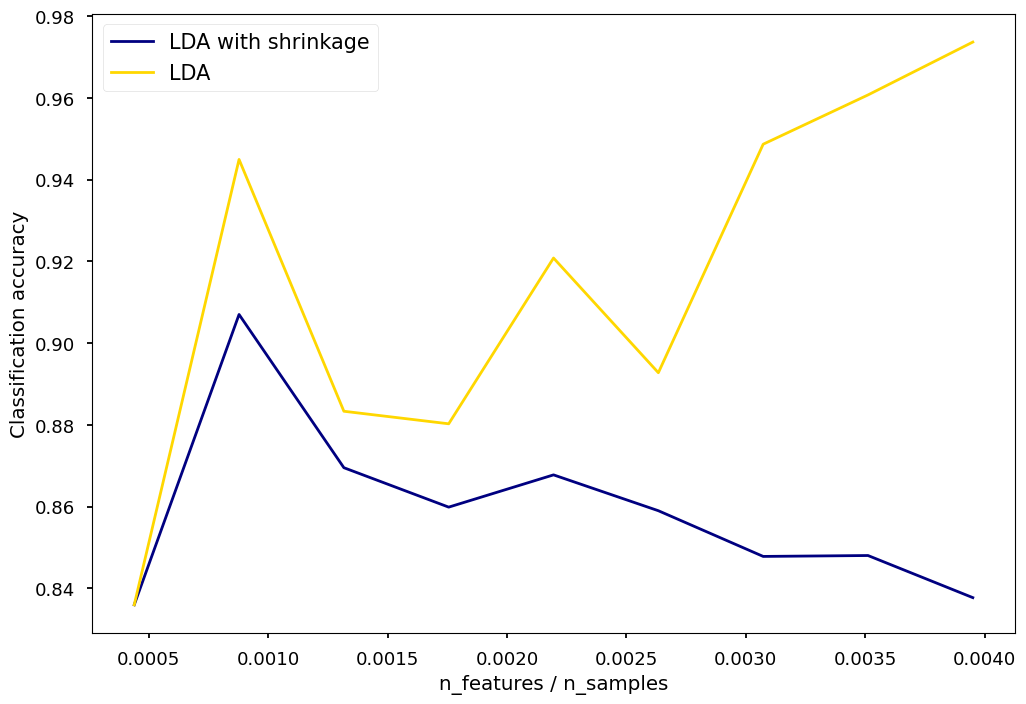

In [168]:
# Plotting
features_samples_ratio = np.array(n_features_range) / len(df)

with plt.style.context('seaborn-talk'):
    plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
             label="LDA with shrinkage", color='navy')
    plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
             label="LDA", color='gold')
    
    plt.xlabel('n_features / n_samples')
    plt.ylabel('Classification accuracy')
    plt.legend(prop={'size': 15})
    plt.tight_layout()
    plt.show()

In [169]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [170]:
newfailure_df.head()

,F1,F2,F3,age_group
0,5127.853295,39.702814,-12.950023,Adult
1,5123.853626,-38.711049,9.603183,Adult
2,5115.854930,-51.444231,17.989504,Adult
3,5114.856928,-29.183024,6.387583,Adult
4,5111.857927,-31.396033,-0.734321,Adult


In [171]:
newfailure_df.head()

,F1,F2,F3,age_group
0,5127.853295,39.702814,-12.950023,Adult
1,5123.853626,-38.711049,9.603183,Adult
2,5115.854930,-51.444231,17.989504,Adult
3,5114.856928,-29.183024,6.387583,Adult
4,5111.857927,-31.396033,-0.734321,Adult


# LDA X PCA from CHAT

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
%matplotlib inline

# Load the NHANES_age_prediction.csv DataFrame
df = pd.read_csv('NHANES_age_prediction.csv')

# Assuming your features are in columns 'feature1', 'feature2', etc.
df.drop('SEQN', axis = 1, inplace=True)
X = df[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]  # Replace with actual feature names
y = df['age_group']
target_names = df['age_group'].unique()

In [210]:
# Apply LDA and PCA
X_r_lda = LinearDiscriminantAnalysis(n_components=1).fit_transform(X, y)
X_r_pca = PCA(n_components=4).fit_transform(X)

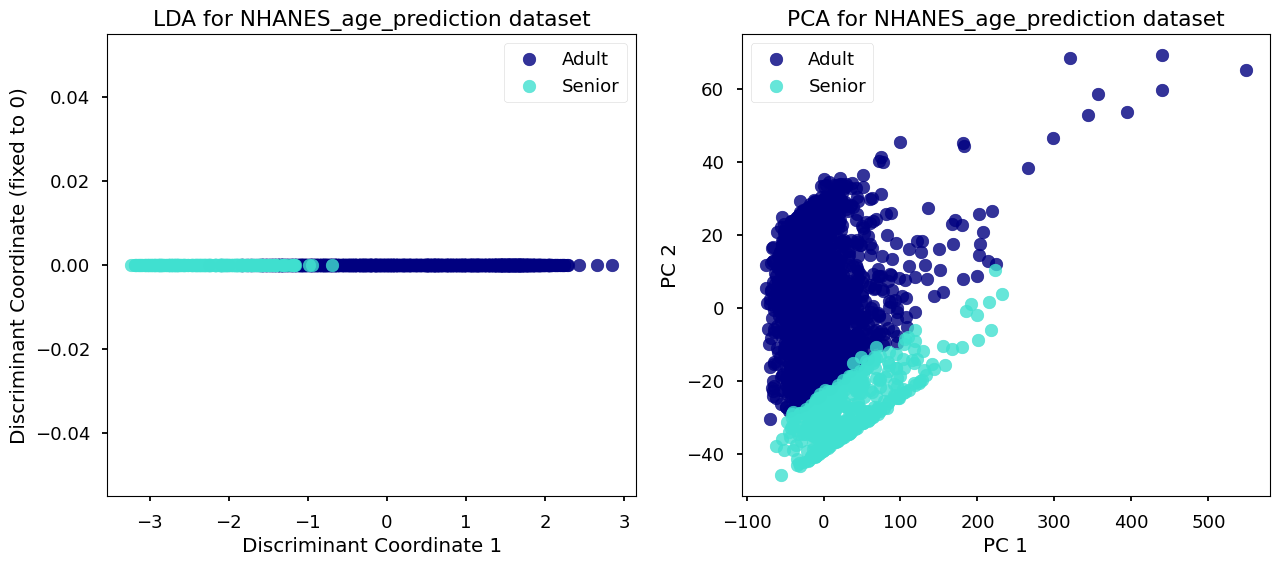

In [211]:
# Plotting
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1, 2, figsize=[15, 6])
    colors = ['navy', 'turquoise', 'darkorange']  # Adjust colors as needed

    for color, target_label in zip(colors, target_names):
        mask = (y == target_label)
        axes[0].scatter(X_r_lda[mask, 0], [0] * sum(mask), alpha=.8, label=target_label, color=color)
        axes[1].scatter(X_r_pca[mask, 0], X_r_pca[mask, 1], alpha=.8, label=target_label, color=color)

    axes[0].set_title('LDA for NHANES_age_prediction dataset')
    axes[1].set_title('PCA for NHANES_age_prediction dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate (fixed to 0)')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')
    axes[0].legend()
    axes[1].legend()
    
plt.show()

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

# Load the NHANES_age_prediction.csv DataFrame
df = pd.read_csv('NHANES_age_prediction.csv')

# Assuming your features are in columns 'RIDAGEYR', 'RIAGENDR', etc.
X = df[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN']]  # Replace with actual feature names
y = df['age_group']


IndexError: index 1 is out of bounds for axis 1 with size 1

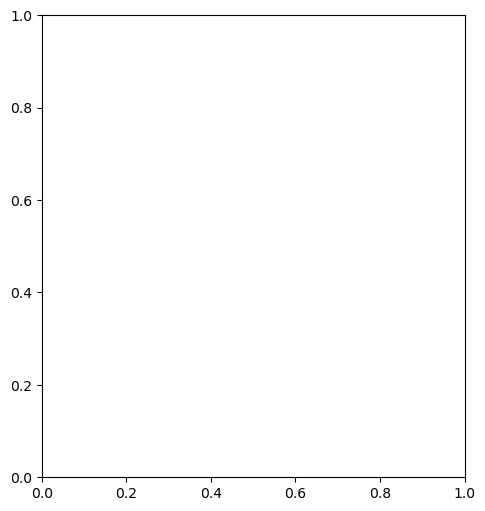

In [191]:
# Apply Dimensionality Reduction
lda = LinearDiscriminantAnalysis(n_components=1)
X_r_lda = lda.fit_transform(X, y)

pca = PCA(n_components=0)
X_r_pca = pca.fit_transform(X)

# Visualize the Results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for class_label in y.unique():
    mask = (y == class_label)
    plt.scatter(X_r_lda[mask, 0], X_r_lda[mask, 1], label=f'Class {class_label}', alpha=0.8)
plt.title('LDA Visualization')
plt.xlabel('Discriminant Coordinate 1')
plt.ylabel('Discriminant Coordinate 2')
plt.legend()

plt.subplot(1, 2, 2)
for class_label in y.unique():
    mask = (y == class_label)
    plt.scatter(X_r_pca[mask, 0], X_r_pca[mask, 1], label=f'Class {class_label}', alpha=0.8)
plt.title('PCA Visualization')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
%matplotlib inline


X = df.data
y = df.age_group
target_names = wine.target_names

X_r_lda = LinearDiscriminantAnalysis(n_components=2).fit(X, y).transform(X)
X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Wine dataset')
    axes[1].title.set_text('PCA for Wine dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

# LDA x PCA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [ ]:

# Extract features and target variable
X = df.drop('age_group', axis=1)
y = df['age_group']

# Fit LDA and PCA models
lda = LinearDiscriminantAnalysis(n_components=2)
pca = PCA(n_components=2)

X_r_lda = lda.fit(X, y).transform(X)
X_r_pca = pca.fit(X).transform(X)

In [ ]:
# Plotting
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1, 2, figsize=[15, 6])
    unique_labels = df['age_group'].unique()
    colors = plt.cm.rainbow([float(i) / len(unique_labels) for i in range(len(unique_labels))])

    for color, label in zip(colors, unique_labels):
        axes[0].scatter(X_r_lda[y == label, 0], X_r_lda[y == label, 1], alpha=.8, label=f'age_group {label}', color=color)
        axes[1].scatter(X_r_pca[y == label, 0], X_r_pca[y == label, 1], alpha=.8, label=f'age_group {label}', color=color)
    
    axes[0].set_title('LDA for NHANES dataset')
    axes[1].set_title('PCA for NHANES dataset')
    axes[0].set_xlabel('Discriminant Coordinate 1')
    axes[0].set_ylabel('Discriminant Coordinate 2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')
    axes[0].legend()
    axes[1].legend()

plt.show()